# Análise explorátoria dos dados de treino/teste

https://www.kaggle.com/datasets/computingvictor/transactions-fraud-datasets

##  Importação de bibliotecas e dados

In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive

  os.makedirs('./datasets', exist_ok=True)
  drive.mount('/content/drive')

  shutil.copy('/content/drive/MyDrive/DataScience/Analytics/Estudo Fraude/df_notarget.parquet'  ,'/content/datasets/')
  shutil.copy('/content/drive/MyDrive/DataScience/Analytics/Estudo Fraude/df_train_test.parquet','/content/datasets/')
  shutil.copy('/content/drive/MyDrive/DataScience/Analytics/Estudo Fraude/df_validation.parquet','/content/datasets/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_parquet('./datasets/df_train_test.parquet', engine='pyarrow')
df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,Debit (Prepaid),5497590243197280,07/2022,306,YES,2,55.0,05/2008,2008,No
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,...,Credit,5175842699412235,12/2024,438,YES,1,9100.0,09/2005,2015,No
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,...,Debit,5874992802287595,05/2020,256,YES,1,14802.0,01/2006,2008,No
3,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,...,Debit,4354185735186651,01/2020,120,YES,1,19113.0,07/2009,2014,No
4,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464.0,...,Debit (Prepaid),5207231566469664,03/2014,198,YES,1,89.0,01/2008,2015,No


## Ajuste no tipo de dado

In [4]:
df['target'].value_counts()

,count
target,
No,7394705
Yes,10665


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405370 entries, 0 to 7405369
Data columns (total 38 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     int64         
 1   date                   datetime64[ns]
 2   client_id              int64         
 3   card_id                int64         
 4   amount                 float64       
 5   use_chip               object        
 6   merchant_id            int64         
 7   merchant_city          object        
 8   merchant_state         object        
 9   zip                    float64       
 10  mcc                    object        
 11  errors                 object        
 12  description            object        
 13  target                 object        
 14  current_age            int64         
 15  retirement_age         int64         
 16  birth_year             int64         
 17  birth_month            int64         
 18  gender                

In [6]:
df['id'] = df['id'].astype(str)
df['client_id'] = df['client_id'].astype(str)
df['card_id'] = df['card_id'].astype(str)
df['merchant_id'] = df['merchant_id'].astype(str)
df['zip'] = df['zip'].astype(str)
df['card_number'] = df['card_number'].astype(str)
df['cvv'] = df['cvv'].astype(str)
df['birth_year'] = df['birth_year'].astype(str)
df['birth_month'] = df['birth_month'].astype(str)


1. **id**: Identificador único da transação.
2. **date**: Data em que a transação foi realizada.
3. **client_id**: Identificador único do cliente.
4. **card_id**: Identificador único do cartão utilizado na transação.
5. **amount**: Valor da transação.
6. **use_chip**: Indicador se a transação foi efetuada com o uso de chip (sim/não).
7. **merchant_id**: Identificador do comerciante onde a transação foi realizada.
8. **merchant_city**: Cidade onde está localizado o comerciante.
9. **merchant_state**: Estado onde está localizado o comerciante.
10. **zip**: Código postal do local do comerciante.
11. **mcc**: Código de Categoria do Comerciante, que indica o tipo de negócio ou setor do comerciante.
12. **errors**: Indicador de erros ocorridos durante a transação.
13. **description**: Descrição ou comentário associado à transação.
14. **target**: Indicador se a transação foi fraudulenta (Yes) ou não (No).
15. **current_age**: Idade atual do cliente.
16. **retirement_age**: Idade de aposentadoria do cliente.
17. **birth_year**: Ano de nascimento do cliente.
18. **birth_month**: Mês de nascimento do cliente.
19. **gender**: Gênero do cliente.
20. **address**: Endereço residencial do cliente.
21. **latitude**: Latitude do endereço do cliente.
22. **longitude**: Longitude do endereço do cliente.
23. **per_capita_income**: Renda per capita do cliente ou região.
24. **yearly_income**: Renda anual do cliente.
25. **total_debt**: Dívida total do cliente.
26. **credit_score**: Pontuação de crédito do cliente.
27. **num_credit_cards**: Número de cartões de crédito que o cliente possui.
28. **card_brand**: Bandeira do cartão utilizado na transação (Visa, Mastercard, etc.).
29. **card_type**: Tipo do cartão (crédito, débito, etc.).
30. **card_number**: Número do cartão utilizado na transação.
31. **expires**: Data de expiração do cartão.
32. **cvv**: Código de segurança do cartão.
33. **has_chip**: Indicador se o cartão possui chip (sim/não).
34. **num_cards_issued**: Número de cartões emitidos para o cliente.
35. **credit_limit**: Limite de crédito do cartão.
36. **acct_open_date**: Data de abertura da conta do cliente.
37. **year_pin_last_cha**: Ano da última alteração do PIN do cartão.
38. **card_on_dark_web**: Indicador se o cartão foi encontrado em listas de venda na dark web.

## Análise dos dados

In [191]:
def descritiva(df_, var, vresp: str, max_classes=5):
    """
    Gera um gráfico descritivo da taxa de sobreviventes por categoria da variável especificada.

    Parâmetros:
    df : DataFrame - Base de dados a ser analisada.
    var : str - Nome da variável categórica a ser analisada.
    """

    df = df_.copy()

    if df[var].nunique()>max_classes:
        df[var] = pd.qcut(df[var], max_classes, duplicates='drop')

    fig, ax1 = plt.subplots(figsize=(10, 6))

    sns.pointplot(data=df, y=vresp, x=var, ax=ax1)

    # Criar o segundo eixo y para a taxa de sobreviventes
    ax2 = ax1.twinx()
    sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
    ax2.set_ylabel('Frequência', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    ax1.set_zorder(2)
    ax1.patch.set_visible(False)  # Tornar o fundo do eixo 1 transparente

    # Exibir o gráfico
    plt.show()

### Análise temporal

In [192]:
df_time = pd.DataFrame()
df_time['year'] = df['date'].dt.to_period('Y')
df_time['year_month'] = df['date'].dt.to_period('M').dt.to_timestamp(how='start')
df_time['target'] = df['target']
df_time.head()

,year,year_month,target
0,2010,2010-01-01,No
1,2010,2010-01-01,No
2,2010,2010-01-01,No
3,2010,2010-01-01,No
4,2010,2010-01-01,No


In [193]:
df_time_year = pd.pivot_table(df_time, index='year', columns='target', aggfunc='count').reset_index()
df_time_year.columns = ['year', 'target_no', 'target_yes']
df_time_year['total'] = df_time_year['target_no'] + df_time_year['target_yes']
df_time_year['percent_no'] = df_time_year['target_no'] / df_time_year['total']
df_time_year['percent_yes'] = df_time_year['target_yes'] / df_time_year['total']
df_time_year

,year,target_no,target_yes,total,percent_no,percent_yes
0,2010,828956,2573,831529,0.996906,0.003094
1,2011,863391,37,863428,0.999957,0.000043
2,2012,884498,923,885421,0.998958,0.001042
3,2013,905967,1337,907304,0.998526,0.001474
4,2014,914409,664,915073,0.999274,0.000726
5,2015,928035,2189,930224,0.997647,0.002353
6,2016,930314,2448,932762,0.997376,0.002624
7,2017,937112,172,937284,0.999816,0.000184
8,2018,202023,322,202345,0.998409,0.001591


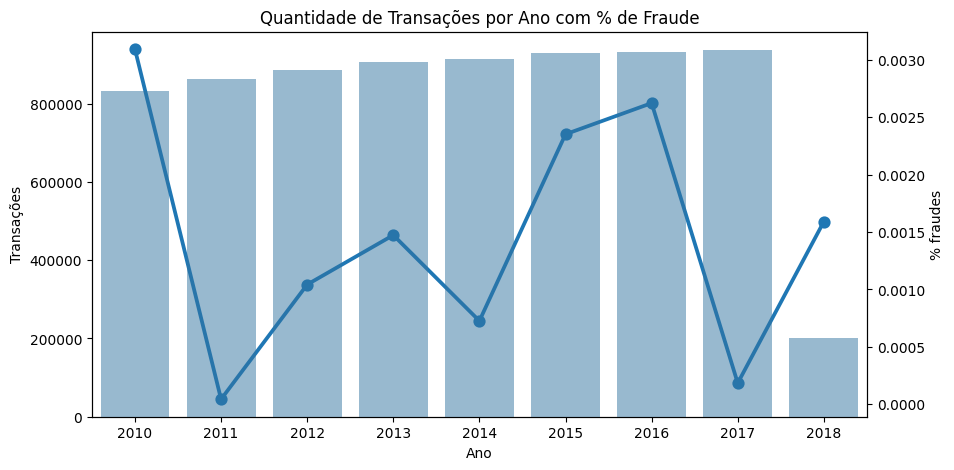

In [194]:
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Quantidade de Transações por Ano com % de Fraude')
sns.barplot(data=df_time_year, x='year', y='total', alpha=0.5, ax=ax1)
ax1.set_ylabel('Transações')
ax1.set_xlabel('Ano')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
sns.pointplot(data=df_time_year, y='percent_yes', x='year', ax=ax2)

ax2.set_ylabel('% fraudes')

ax1.set_zorder(2)
ax1.patch.set_visible(False)

plt.show()

del df_time_year

In [195]:
df_time = pd.DataFrame()
df_time['year'] = df['date'].dt.to_period('Y')
df_time['year_month'] = df['date'].dt.to_period('M').dt.to_timestamp(how='start')
df_time['amount'] = df['amount']
df_time['target'] = df['target']
df_time.head()

,year,year_month,amount,target
0,2010,2010-01-01,-77.00,No
1,2010,2010-01-01,14.57,No
2,2010,2010-01-01,80.00,No
3,2010,2010-01-01,46.41,No
4,2010,2010-01-01,4.81,No


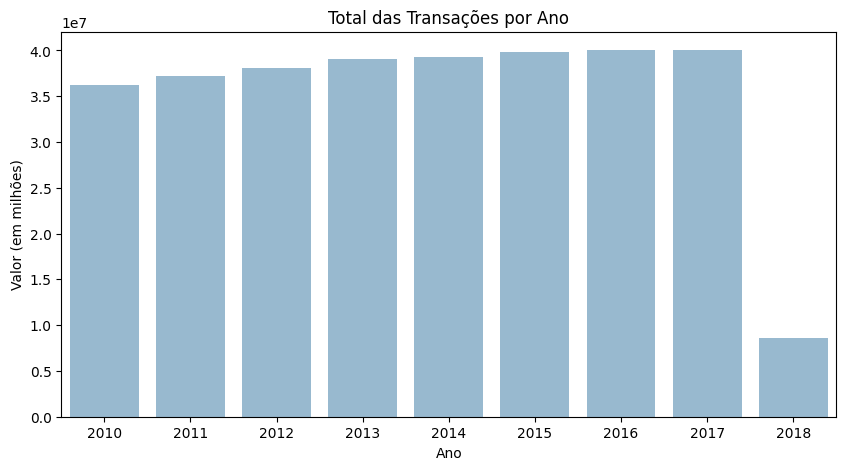

In [199]:
df_time_year = df_time.groupby(['year'])['amount'].sum().reset_index()

plt.subplots(figsize=(10, 5))
plt.title('Total das Transações por Ano')
sns.barplot(data=df_time_year, x='year', y='amount', alpha=0.5)
plt.ylabel('Valor (em milhões)')
plt.xlabel('Ano')

plt.show()

In [200]:
df_time_year = df_time.groupby(['year','target'])['amount'].sum().reset_index()
df_time_year['amount_million'] = df_time_year['amount'] / 1000000
df_time_year.head()

,year,target,amount,amount_million
0,2010,No,35918813.06,35.918813
1,2010,Yes,307936.83,0.307937
2,2011,No,37251408.65,37.251409
3,2011,Yes,4745.40,0.004745
4,2012,No,38004741.12,38.004741


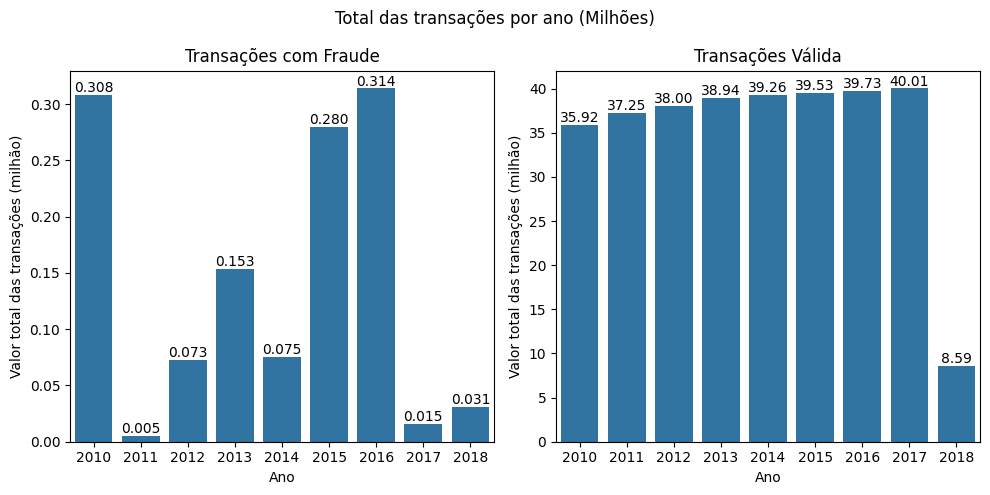

In [201]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title('Transações com Fraude')
ax1 = sns.barplot(data=df_time_year.query('target == "Yes"'), x='year', y='amount_million')
for patches in ax1.patches:
    ax1.annotate(f'{patches.get_height():.3f}', (patches.get_x() + patches.get_width() / 2., patches.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.ylabel('Valor total das transações (milhão)')
plt.xlabel('Ano')

plt.subplot(122)
plt.title('Transações Válida')
ax2 = sns.barplot(data=df_time_year.query('target == "No"'), x='year', y='amount_million')
for patches in ax2.patches:
    ax2.annotate(f'{patches.get_height():.2f}', (patches.get_x() + patches.get_width() / 2., patches.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.ylabel('Valor total das transações (milhão)')
plt.xlabel('Ano')

plt.suptitle('Total das transações por ano (Milhões)')
plt.tight_layout()
plt.show()

del df_time_year

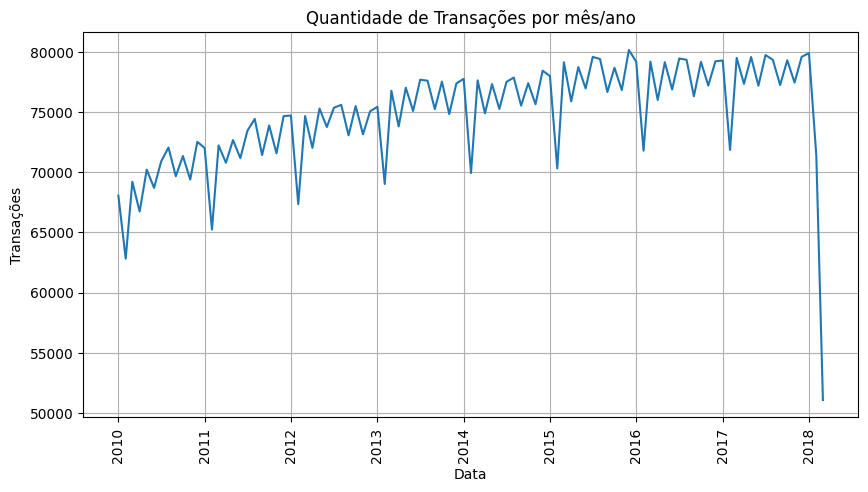

In [202]:
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Quantidade de Transações por mês/ano')
sns.lineplot(df_time['year_month'].value_counts().reset_index().sort_values('year_month', ascending=False).reset_index(drop=True), x='year_month', y='count', ax=ax1)
plt.xlabel('Data')
plt.ylabel('Transações')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [203]:
df_time_month = df_time.groupby(by=['year_month', 'target'])['amount'].agg(['sum', 'mean', 'std']).reset_index()
df_time_month['year'] = df_time_month['year_month'].dt.year
df_time_month['month'] = df_time_month['year_month'].dt.month
df_time_month['amount_million'] = df_time_month['sum'] / 1000000
df_time_month.head()

,year_month,target,sum,mean,std,year,month,amount_million
0,2010-01-01,No,2929129.96,43.115386,82.574700,2010,1,2.929130
1,2010-01-01,Yes,12253.57,114.519346,203.905324,2010,1,0.012254
2,2010-02-01,No,2713507.09,43.376554,82.612872,2010,2,2.713507
3,2010-02-01,Yes,32488.11,125.436718,305.307738,2010,2,0.032488
4,2010-03-01,No,2984733.64,43.294029,83.392894,2010,3,2.984734


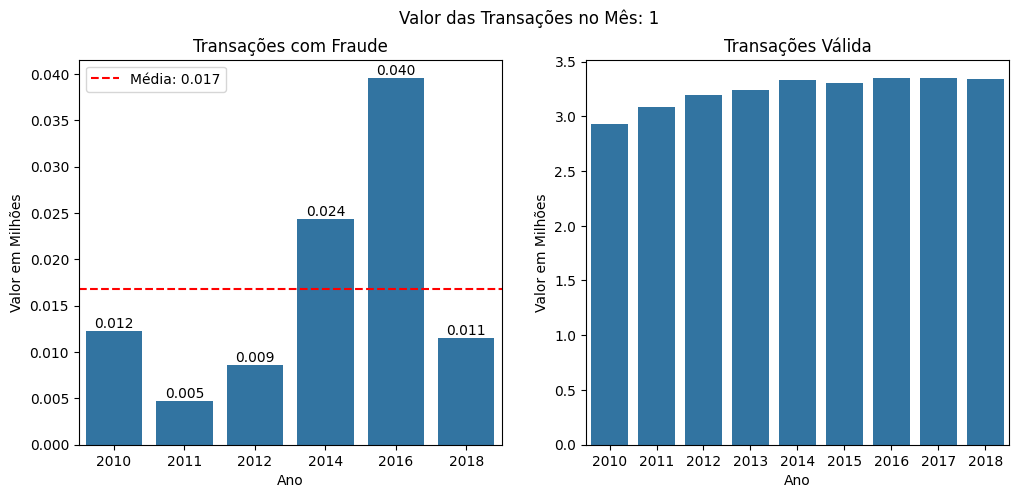

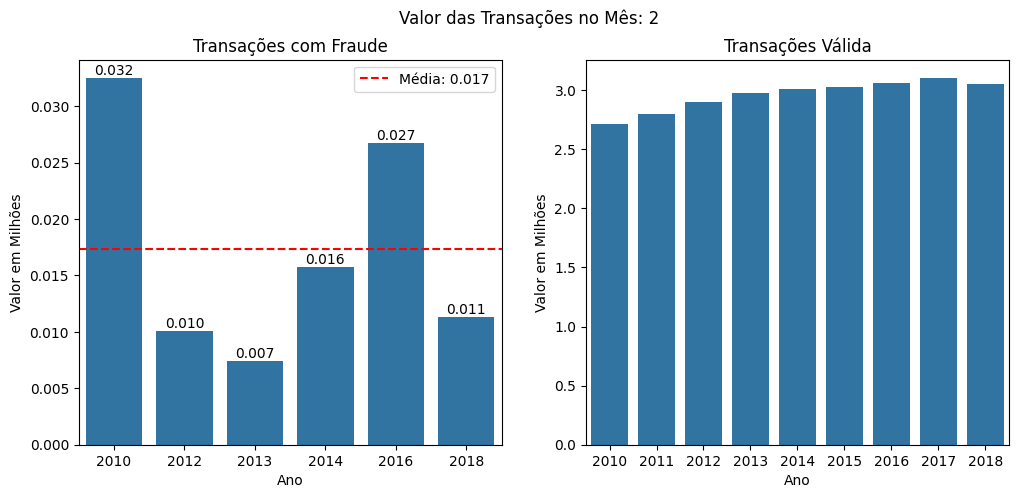

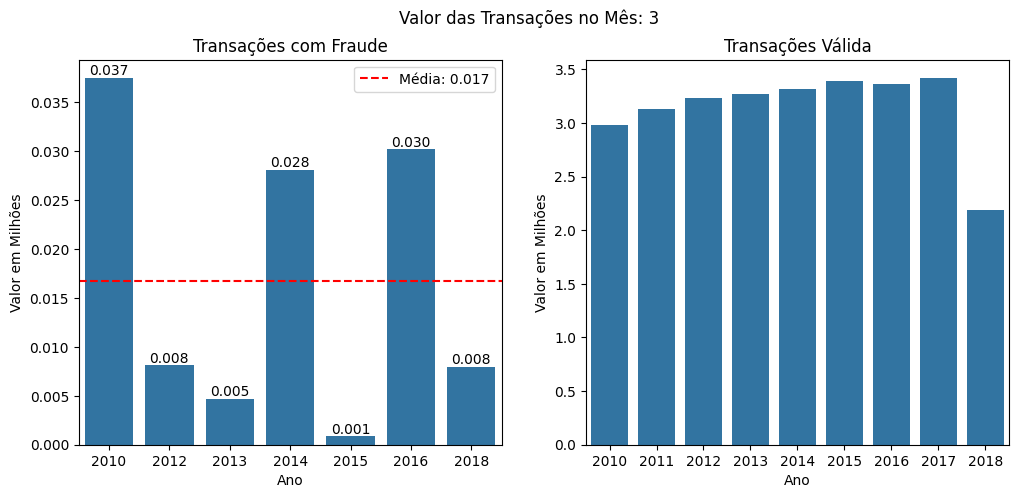

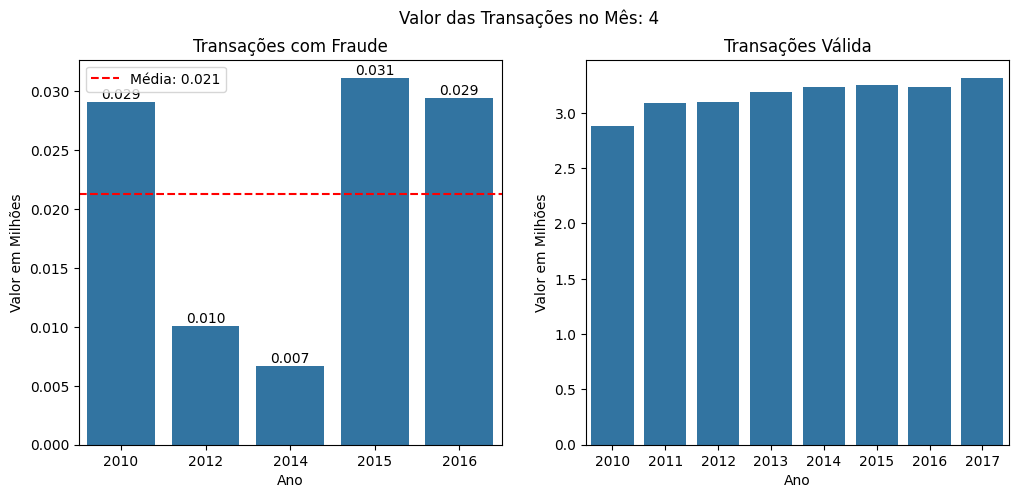

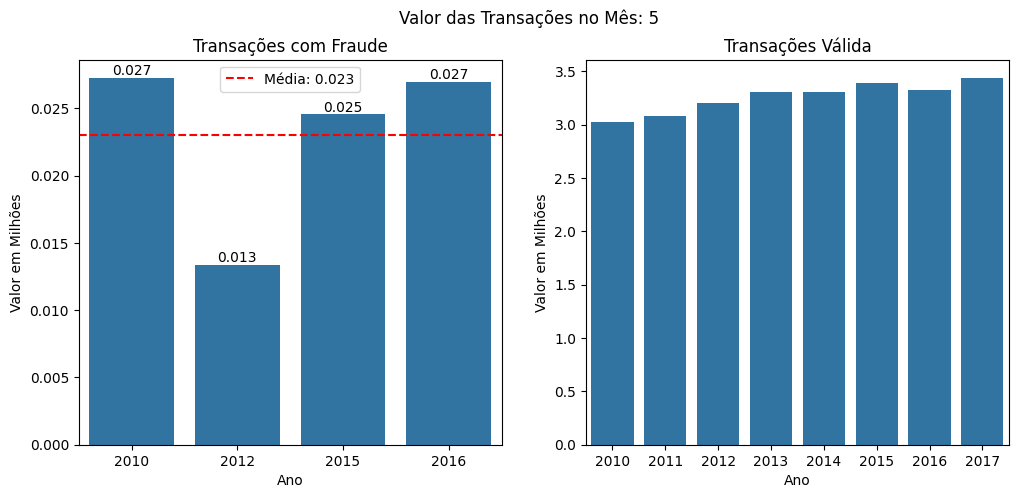

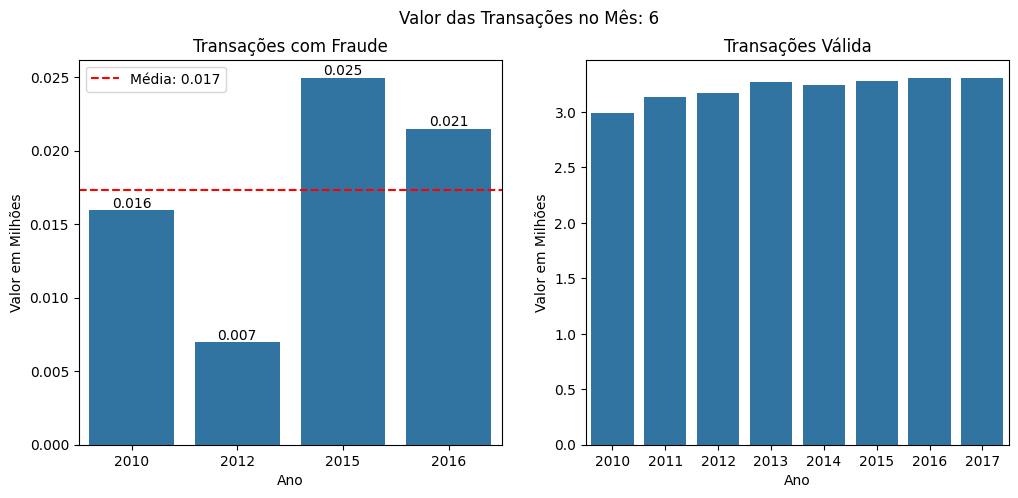

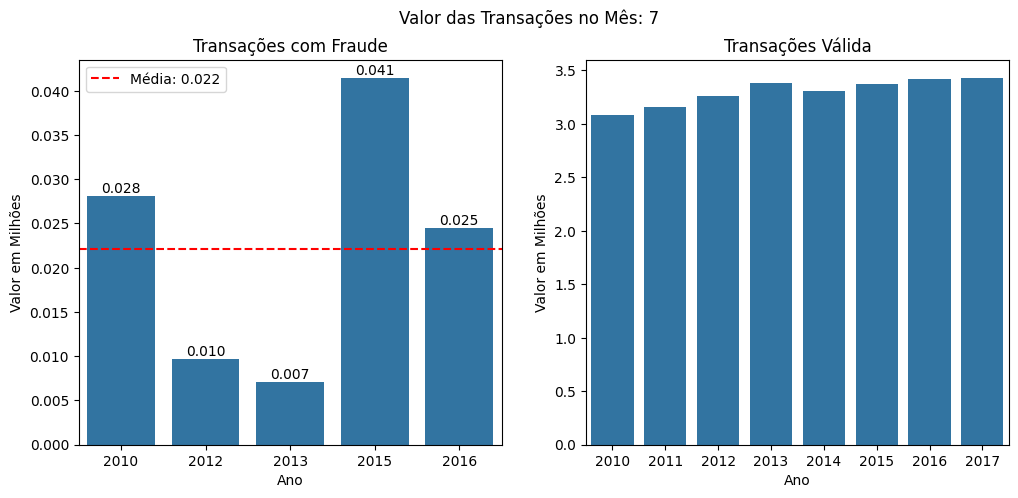

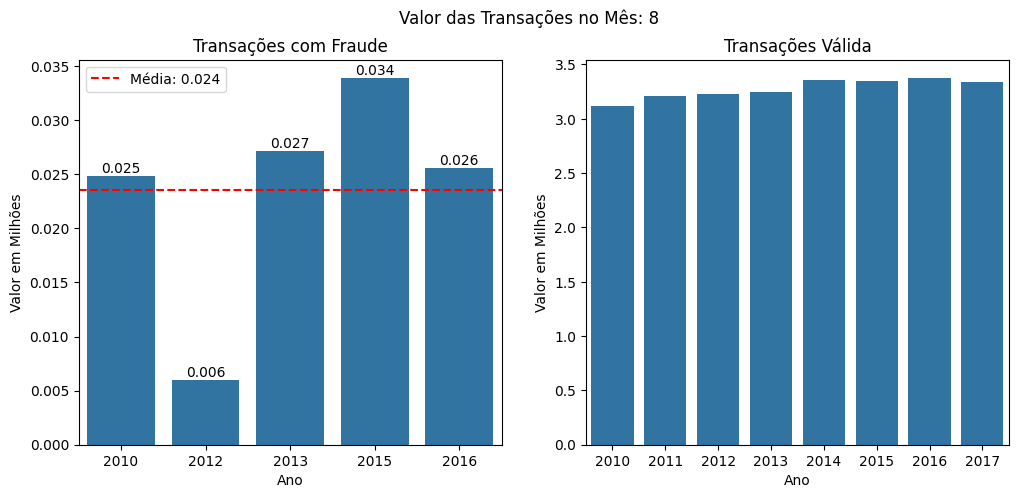

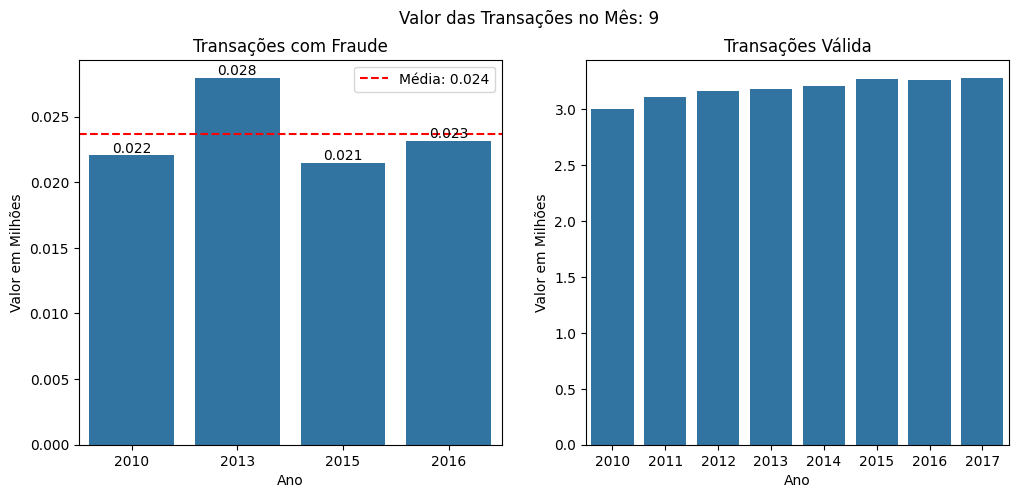

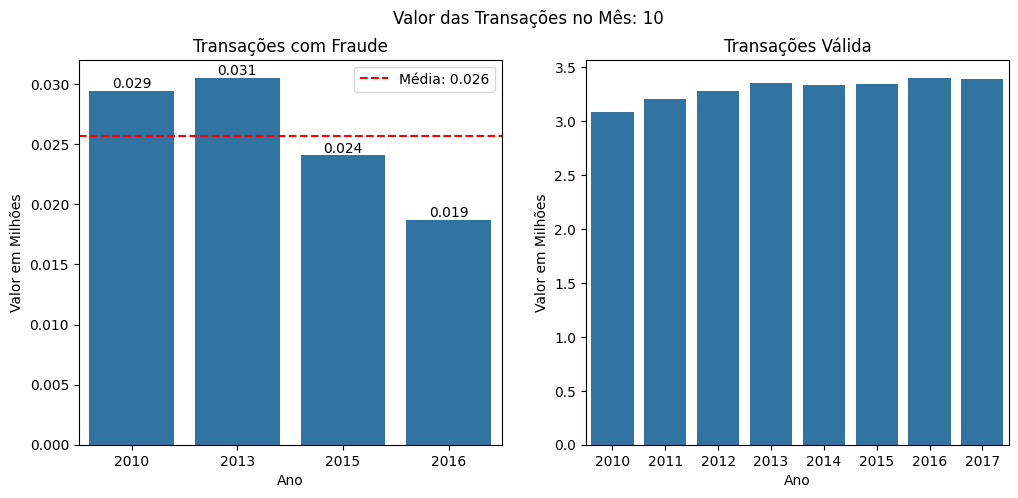

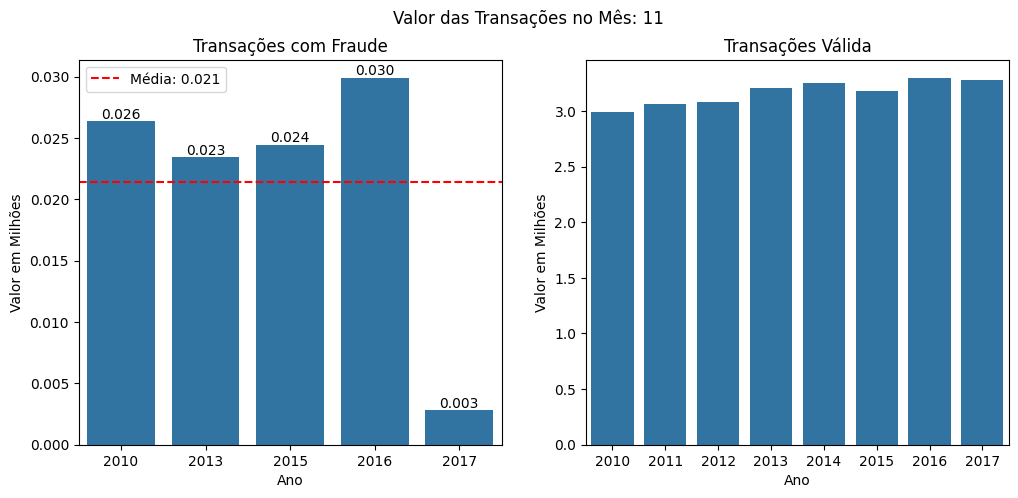

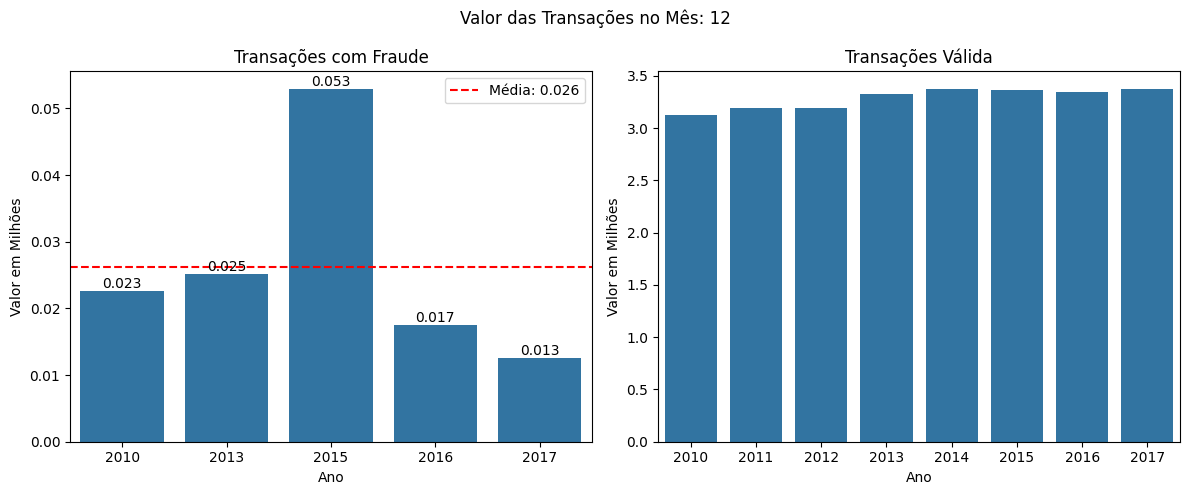

In [204]:
for month in df_time_month['month'].unique():
  df_time_month_month = df_time_month.query('month == @month')

  plt.figure(figsize=(12,5))
  plt.suptitle(f'Valor das Transações no Mês: {month}')

  plt.subplot(121)
  plt.title('Transações com Fraude')

  ax = sns.barplot(data=df_time_month_month.query('target == "Yes"'), x='year', y='amount_million')

  for patches in ax.patches:
    ax.annotate(f'{patches.get_height():.3f}', (patches.get_x() + patches.get_width() / 2., patches.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

  mean = df_time_month_month.query('target == "Yes"')['amount_million'].mean()
  ax.axhline(mean, color='red', linestyle='--', label=f'Média: {mean:.3f}')
  ax.legend()

  plt.ylabel('Valor em Milhões')
  plt.xlabel('Ano')

  plt.subplot(122)
  plt.title('Transações Válida')
  sns.barplot(data=df_time_month_month.query('target == "No"'), x='year', y='amount_million')
  plt.ylabel('Valor em Milhões')
  plt.xlabel('Ano')

plt.tight_layout()
plt.show()

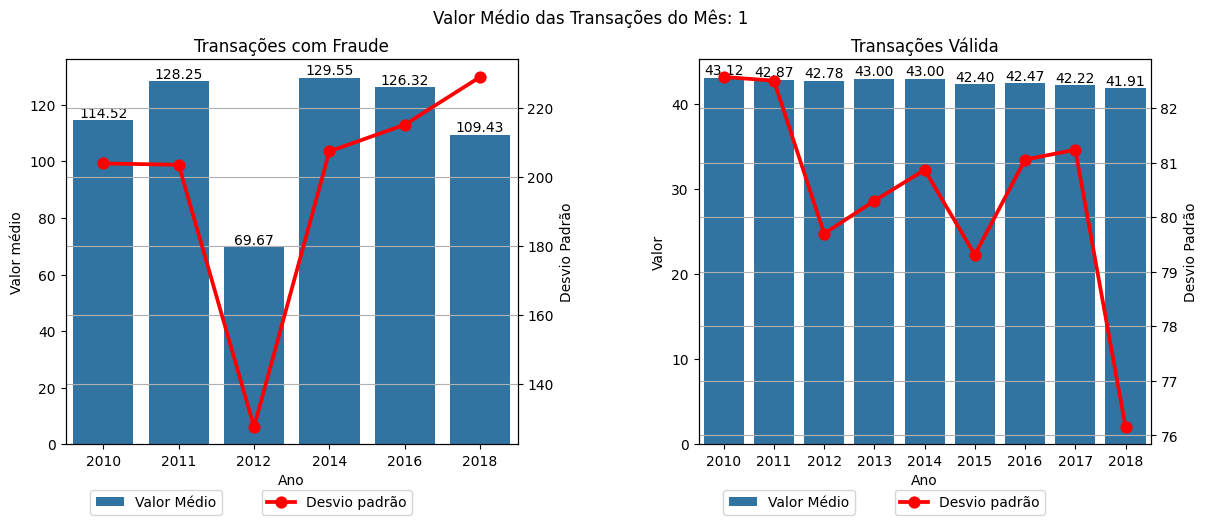

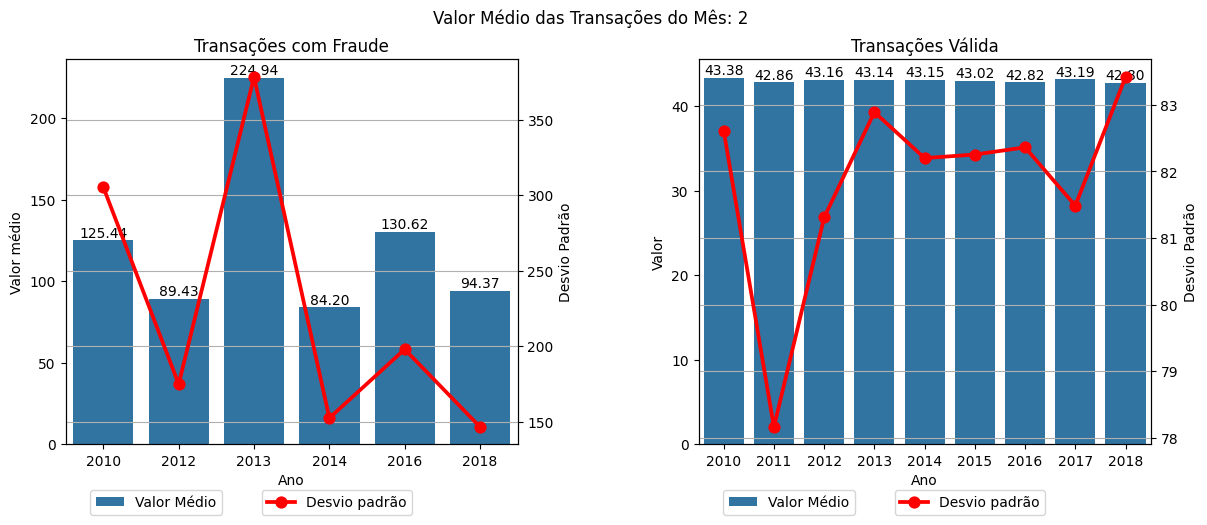

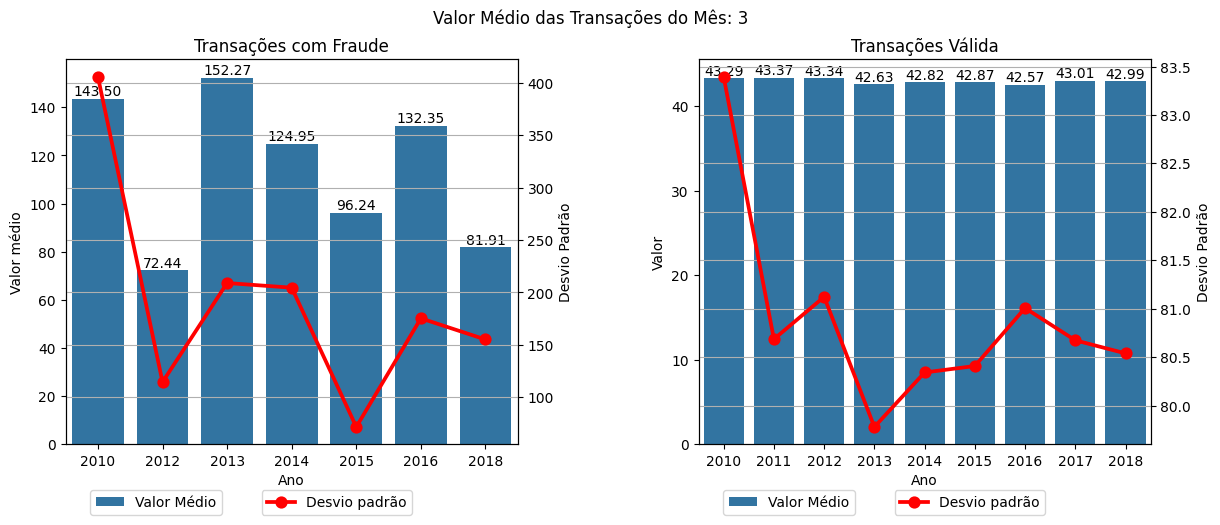

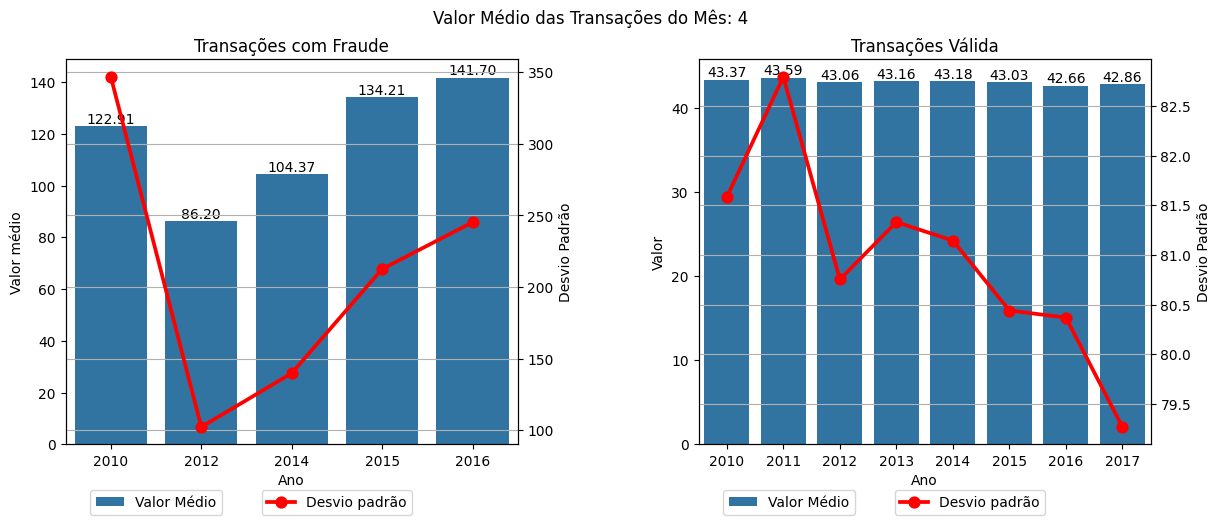

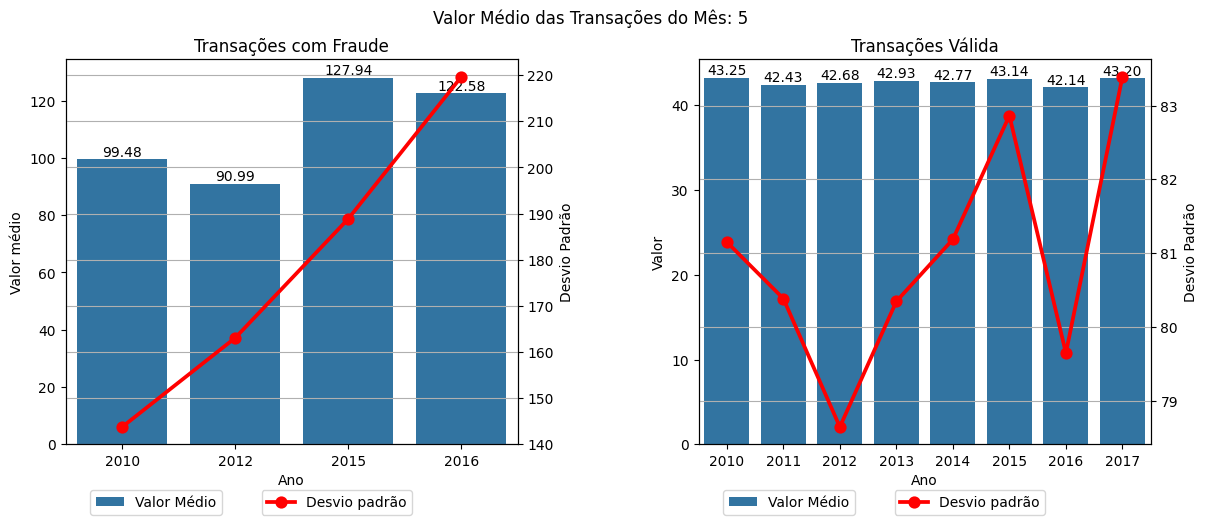

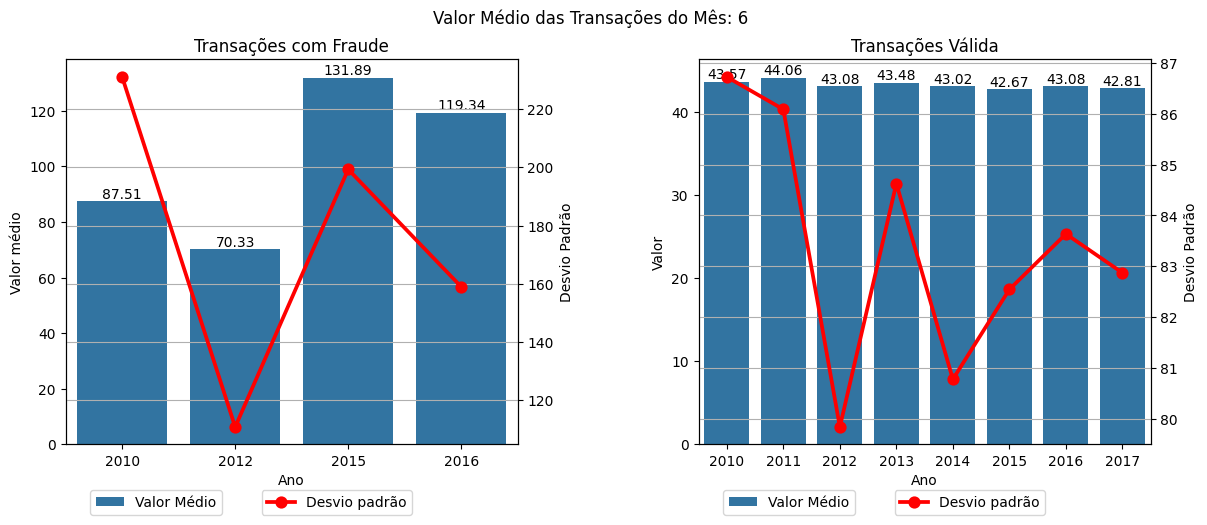

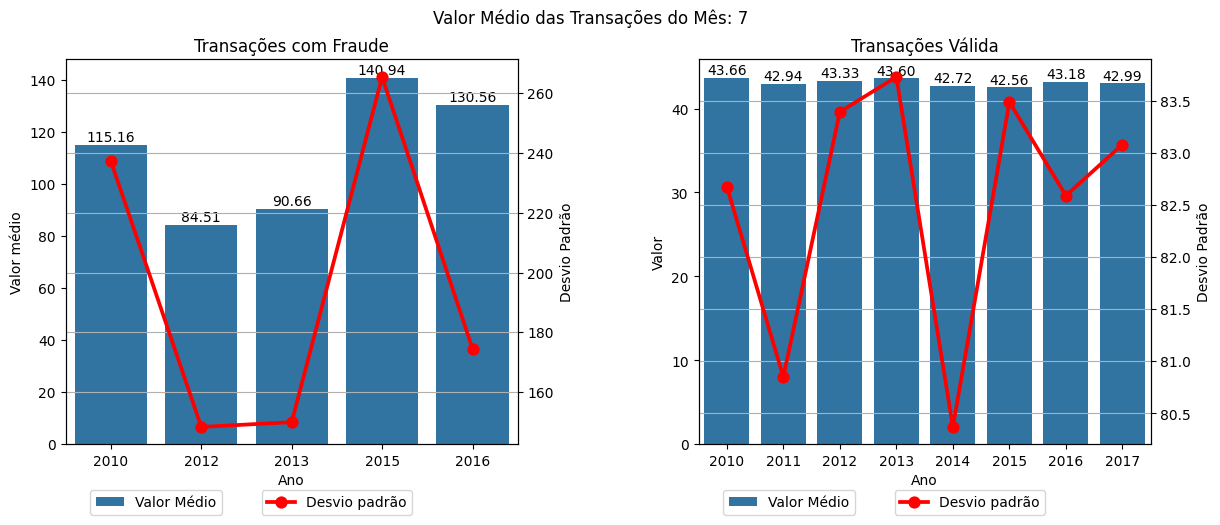

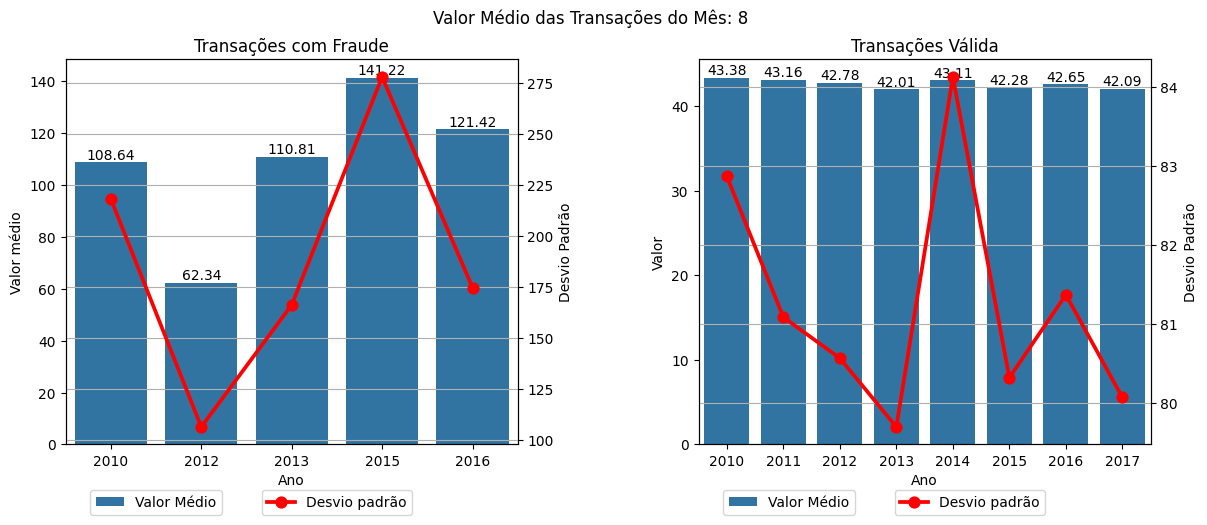

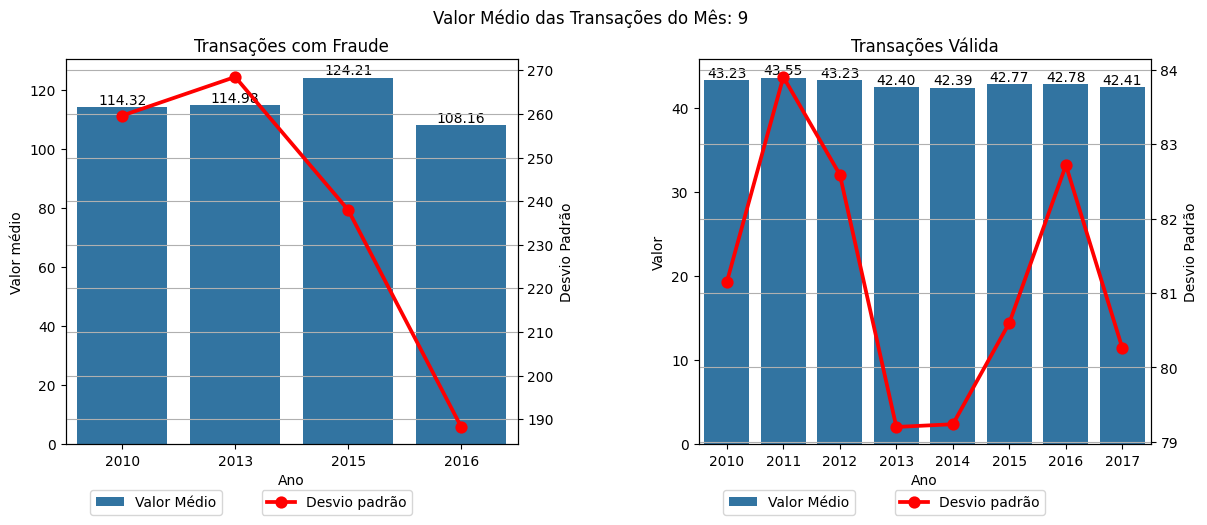

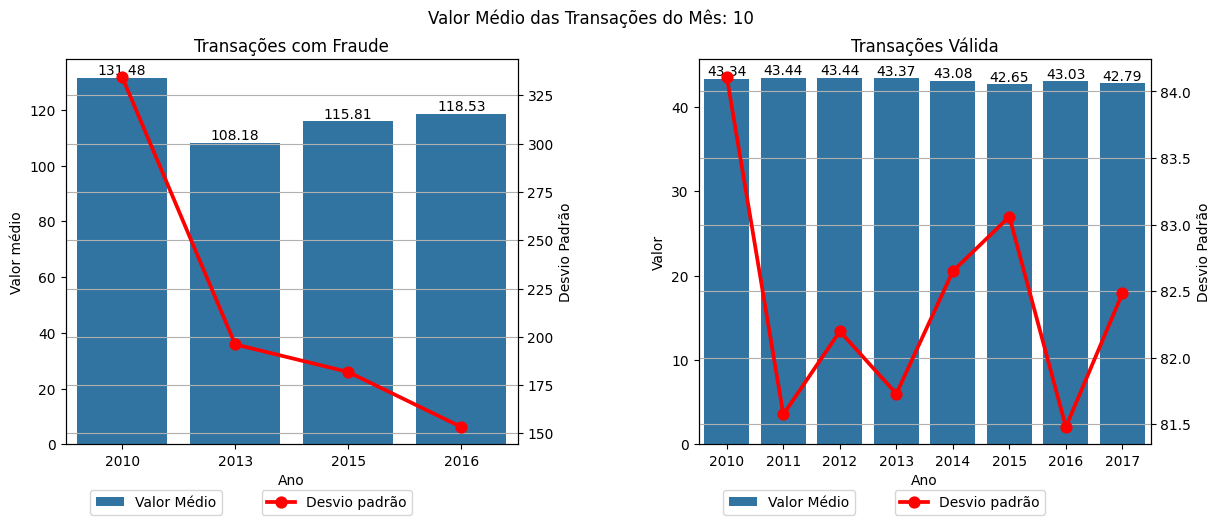

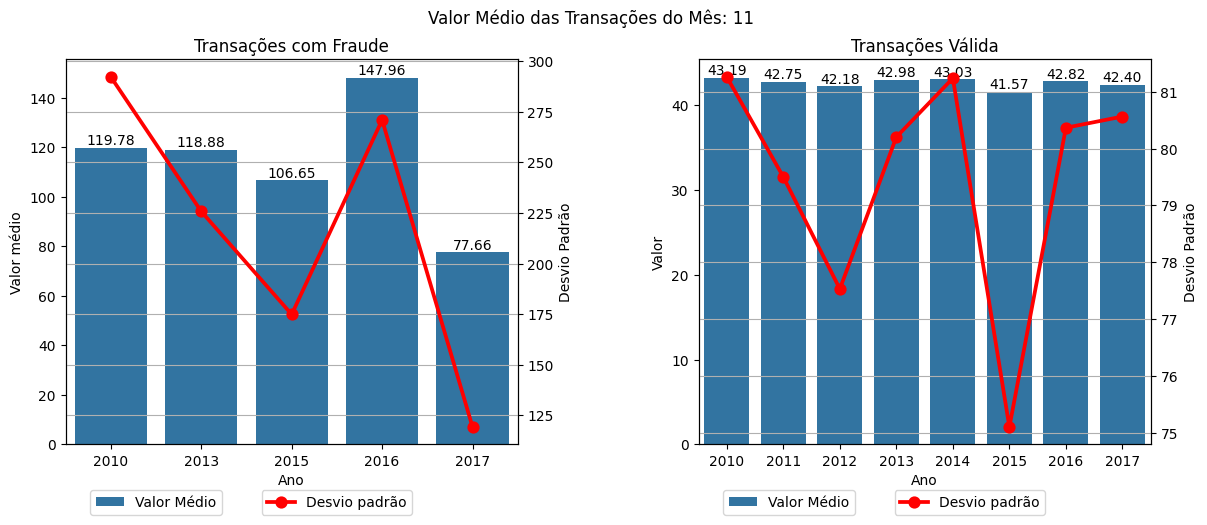

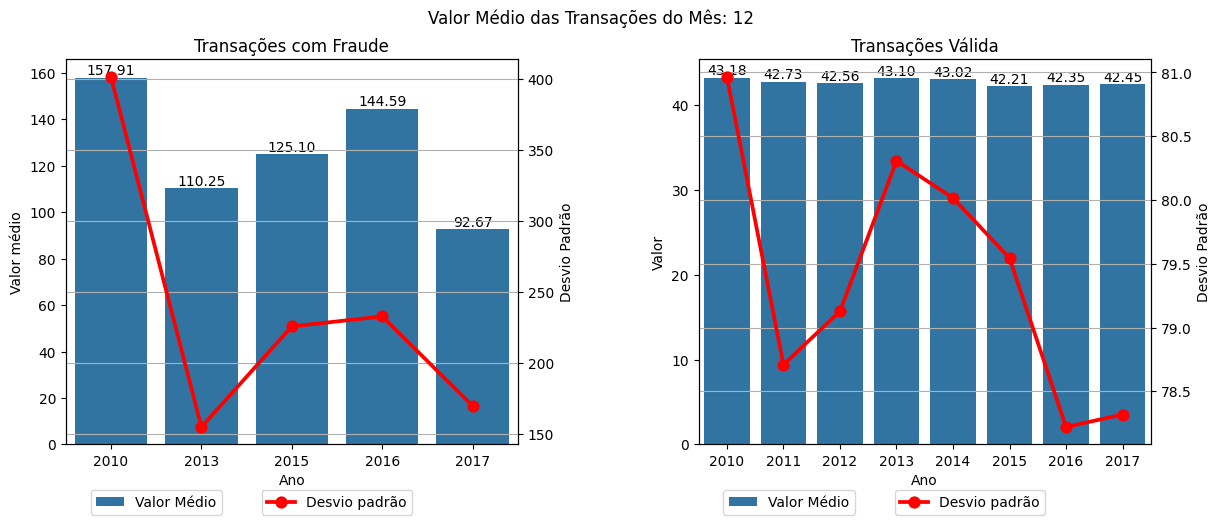

In [205]:
for month in df_time_month['month'].unique():
  df_time_month_month = df_time_month.query('month == @month')

  plt.figure(figsize=(14, 5))

  plt.suptitle(f'Valor Médio das Transações do Mês: {month}')
  plt.subplots_adjust(hspace=0.25, wspace=0.4)

  ax1 = plt.subplot(121)
  plt.title(f'Transações com Fraude')
  ax1 = sns.barplot(data=df_time_month_month.query('target == "Yes"'), x='year', y='mean', ax=ax1, label='Valor Médio')
  ax1.set_ylabel('Valor médio')
  ax1.set_xlabel('Ano')
  ax1.tick_params(axis='y')

  for patches in ax1.patches:
      ax1.annotate(f'{patches.get_height():.2f}', (patches.get_x() + patches.get_width() / 2., patches.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

  ax2 = ax1.twinx()
  ax2 = sns.pointplot(data=df_time_month_month.query('target == "Yes"'), x='year', y='std', ax=ax2, color='red', label='Desvio padrão')

  ax2.set_ylabel('Desvio Padrão')

  ax1.set_zorder(0)
  ax1.patch.set_visible(False)

  plt.grid(True)
  ax1.legend(loc='upper center', bbox_to_anchor=(0.2, -0.10))
  ax2.legend(loc='upper center', bbox_to_anchor=(0.6, -0.10))

  ax3 = plt.subplot(122)
  ax3.set_title('Transações Válida')
  ax3 = sns.barplot(data=df_time_month_month.query('target == "No"'), x='year', y='mean', ax=ax3, label='Valor Médio')

  for patches in ax3.patches:
    ax3.annotate(f'{patches.get_height():.2f}', (patches.get_x() + patches.get_width() / 2., patches.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

  ax3.set_ylabel('Valor')
  ax3.set_xlabel('Ano')

  ax4 = ax3.twinx()
  ax4 = sns.pointplot(data=df_time_month_month.query('target == "No"'), x='year', y='std', ax=ax4, color='red', label='Desvio padrão')

  ax4.set_ylabel('Desvio Padrão')

  ax3.set_zorder(0)
  ax3.patch.set_visible(False)

  ax3.legend(loc='upper center', bbox_to_anchor=(0.2, -0.10))
  ax4.legend(loc='upper center', bbox_to_anchor=(0.6, -0.10))
  plt.grid(True)

plt.show()

### Análise quantitativa

In [206]:
number_columns = df.select_dtypes(include=['float64', 'int64']).columns
number_columns

Index(['amount', 'current_age', 'retirement_age', 'latitude', 'longitude',
       'per_capita_income', 'yearly_income', 'total_debt', 'credit_score',
       'num_credit_cards', 'num_cards_issued', 'credit_limit',
       'year_pin_last_changed'],
      dtype='object')

In [207]:
df[number_columns].describe()

,amount,current_age,retirement_age,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,num_cards_issued,credit_limit,year_pin_last_changed
count,7.405370e+06,7.405370e+06,7.405370e+06,7.405370e+06,7.405370e+06,7.405370e+06,7.405370e+06,7.405370e+06,7.405370e+06,7.405370e+06,7.405370e+06,7.405370e+06,7.405370e+06
mean,4.300867e+01,5.409568e+01,6.648482e+01,3.737115e+01,-9.156545e+01,2.398496e+04,4.668939e+04,5.796217e+04,7.138754e+02,3.842856e+00,1.521537e+00,1.552508e+04,2.011252e+03
std,8.166883e+01,1.569480e+01,3.588236e+00,5.097716e+00,1.625642e+01,1.197932e+04,2.446512e+04,5.201771e+04,6.581421e+01,1.568051e+00,5.149337e-01,1.218646e+04,2.854387e+00
min,-5.000000e+02,2.300000e+01,5.300000e+01,2.130000e+01,-1.581800e+02,0.000000e+00,1.000000e+00,0.000000e+00,4.880000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.002000e+03
25%,8.940000e+00,4.200000e+01,6.500000e+01,3.389000e+01,-9.737000e+01,1.711300e+04,3.281700e+04,1.643700e+04,6.840000e+02,3.000000e+00,1.000000e+00,8.081000e+03,2.009000e+03
50%,2.903000e+01,5.200000e+01,6.600000e+01,3.835000e+01,-8.647000e+01,2.115900e+04,4.106900e+04,5.167900e+04,7.160000e+02,4.000000e+00,2.000000e+00,1.343800e+04,2.011000e+03
75%,6.384000e+01,6.300000e+01,6.800000e+01,4.112000e+01,-8.013000e+01,2.730800e+04,5.399600e+04,8.516000e+04,7.560000e+02,5.000000e+00,2.000000e+00,2.083800e+04,2.013000e+03
max,5.696780e+03,1.010000e+02,7.900000e+01,4.853000e+01,-6.867000e+01,1.631450e+05,2.801990e+05,4.618540e+05,8.500000e+02,9.000000e+00,3.000000e+00,1.413910e+05,2.020000e+03


In [213]:
def plot_hist_box(df_, var):
  data = df[var]

  fig = plt.figure(figsize=(15,4))
  ax1 = fig.add_subplot(1, 3, 1)
  ax1.set_title('Histograma')
  sns.histplot(data, kde=True, ax = ax1)
  ax1.set_xlabel(var)
  ax1.tick_params(axis='x', rotation=90)
  ax1.set_ylabel('Frequência')

  ax2 = fig.add_subplot(1, 3, 2)
  ax2.set_title('Boxplot')
  sns.boxplot(data, ax=ax2)
  ax2.set_ylabel('Frequência')

  ax3 = fig.add_subplot(1, 3, 3)
  ax3.set_title('QQ-plot')
  sm.qqplot(data, line='s', ax=ax3)

  plt.suptitle(f'{var}')
  plt.tight_layout()
  plt.show()

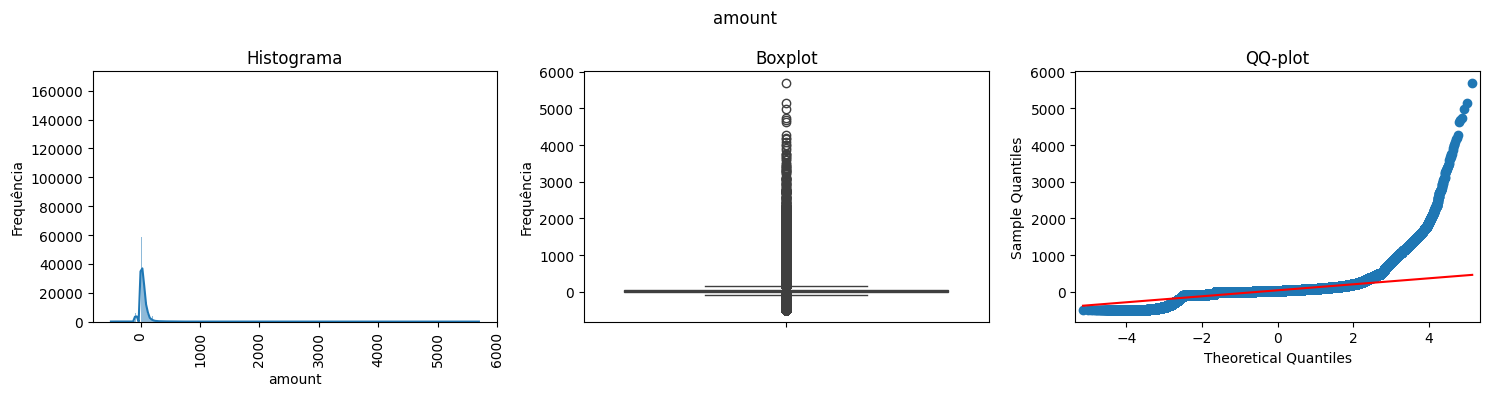

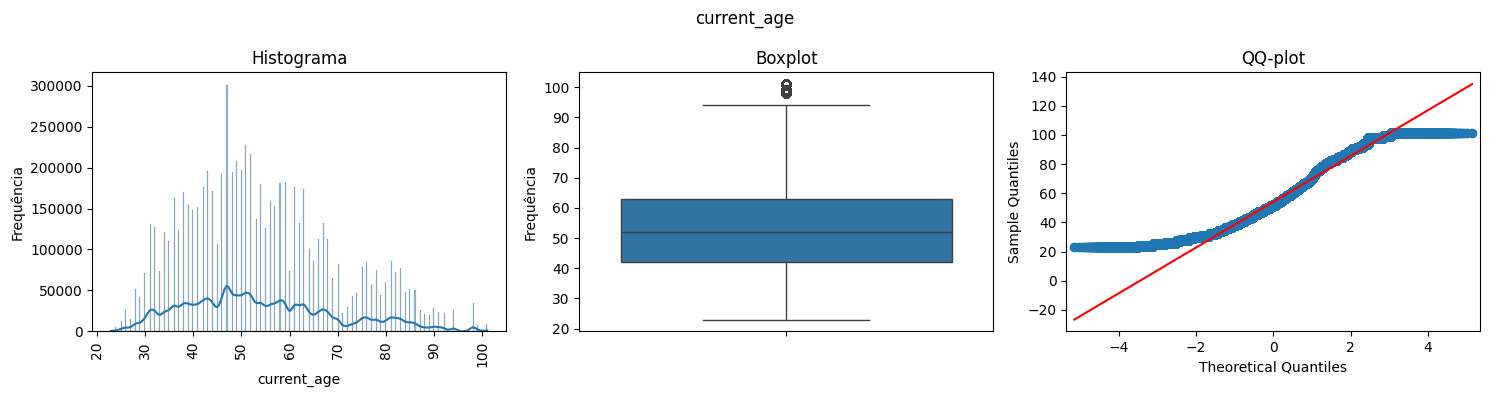

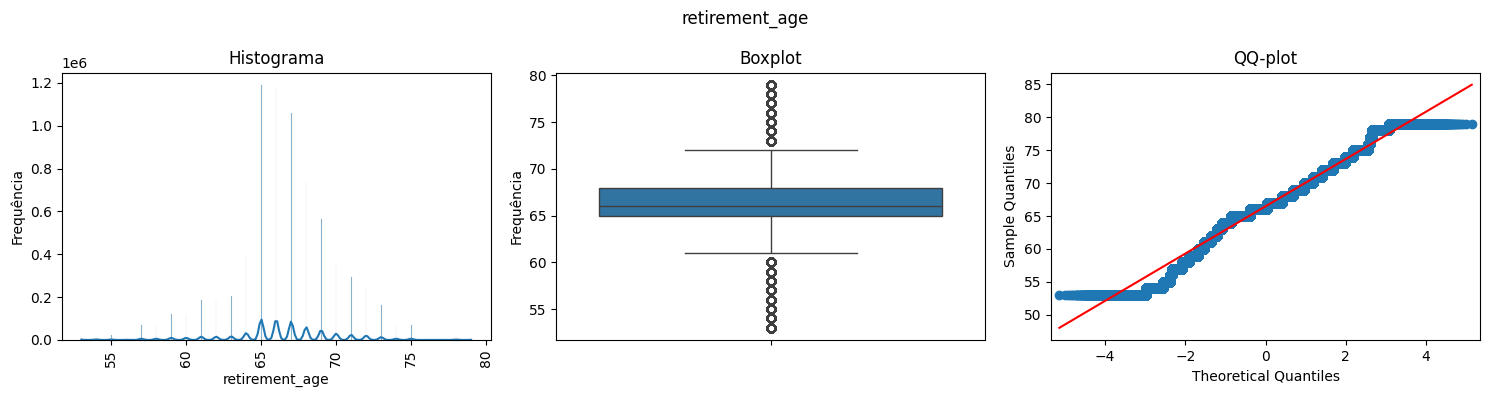

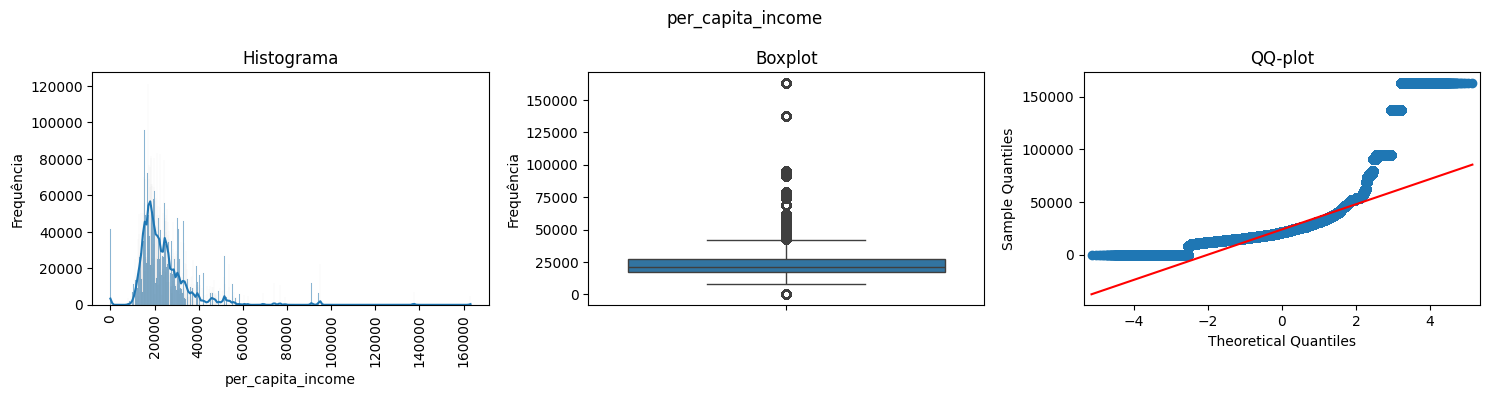

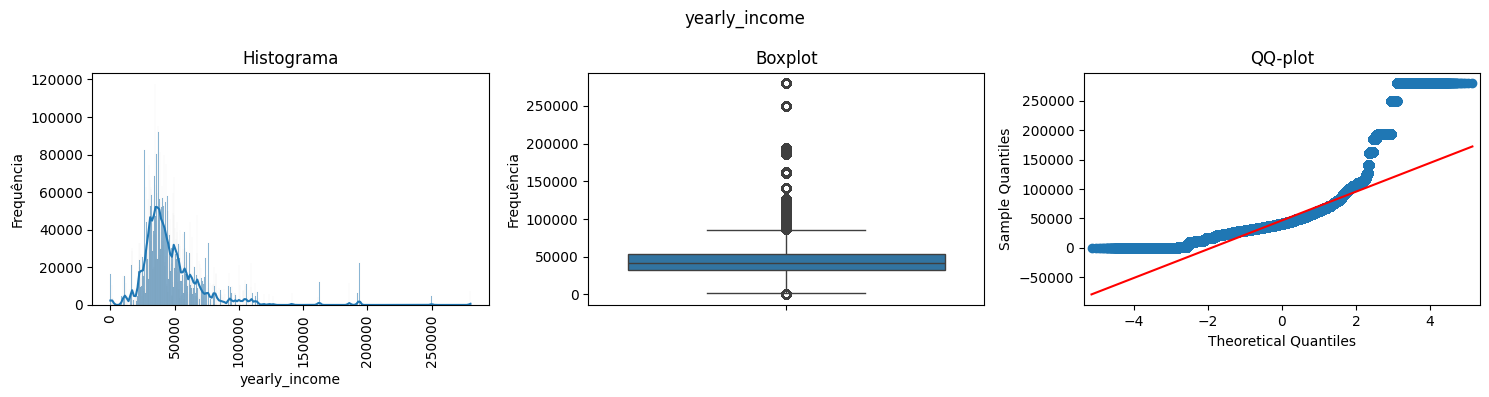

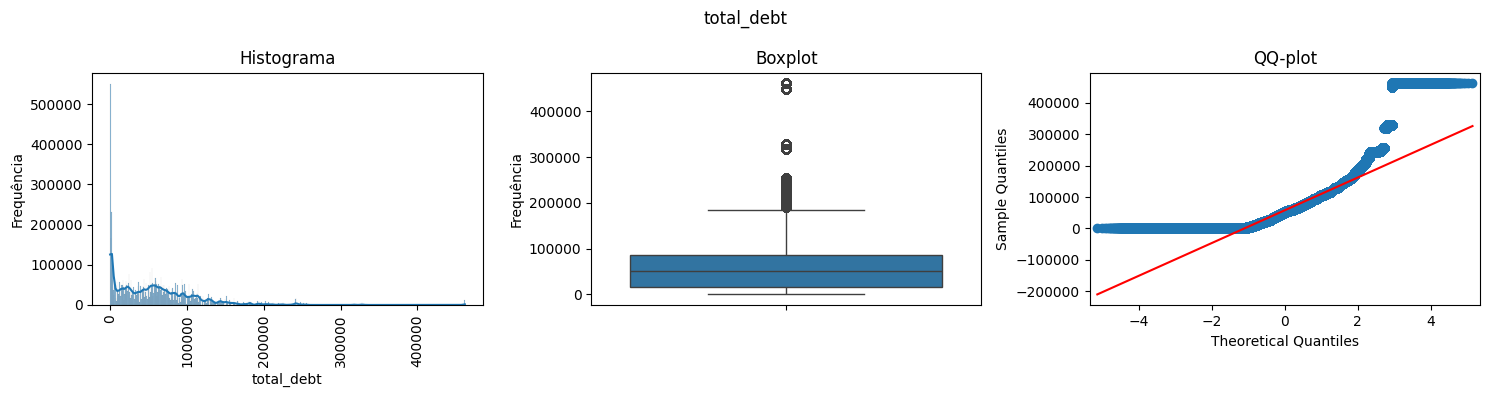

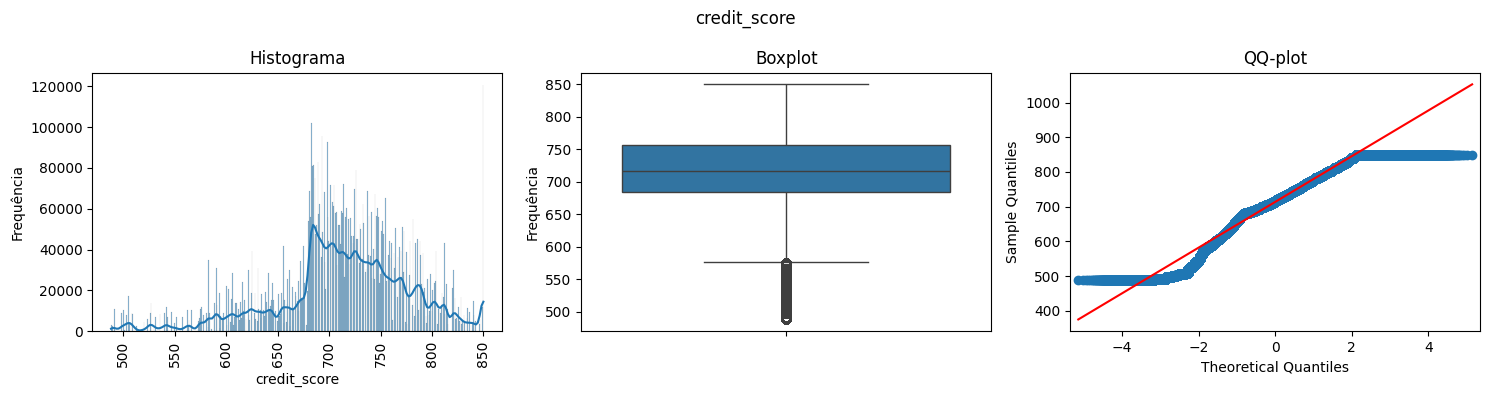

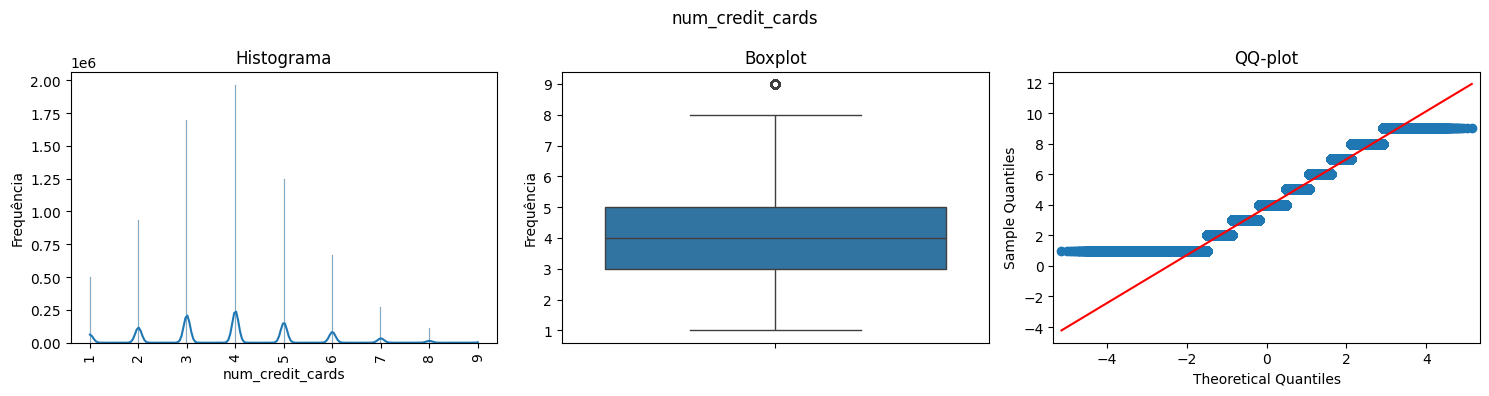

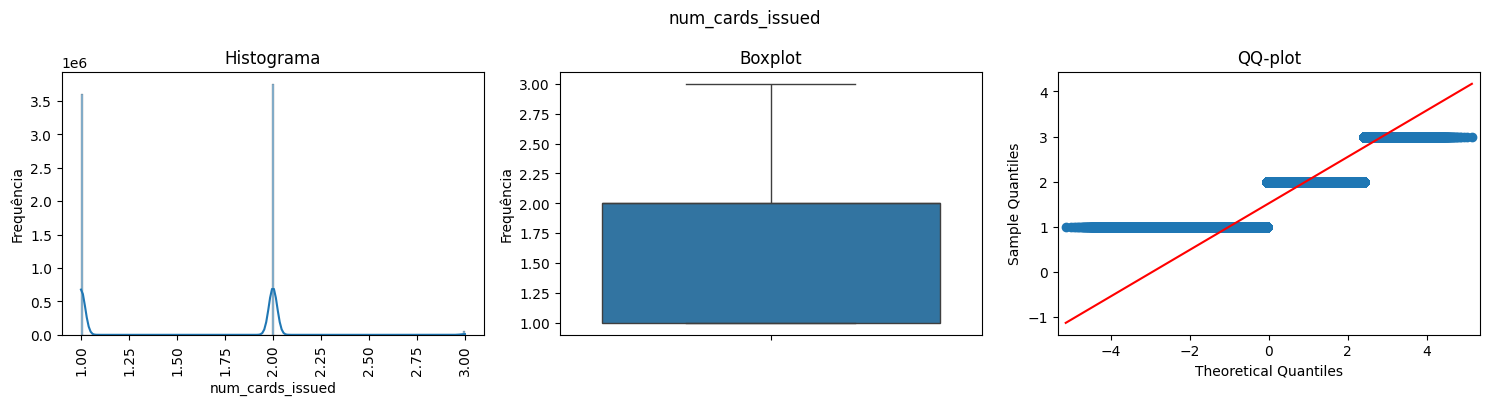

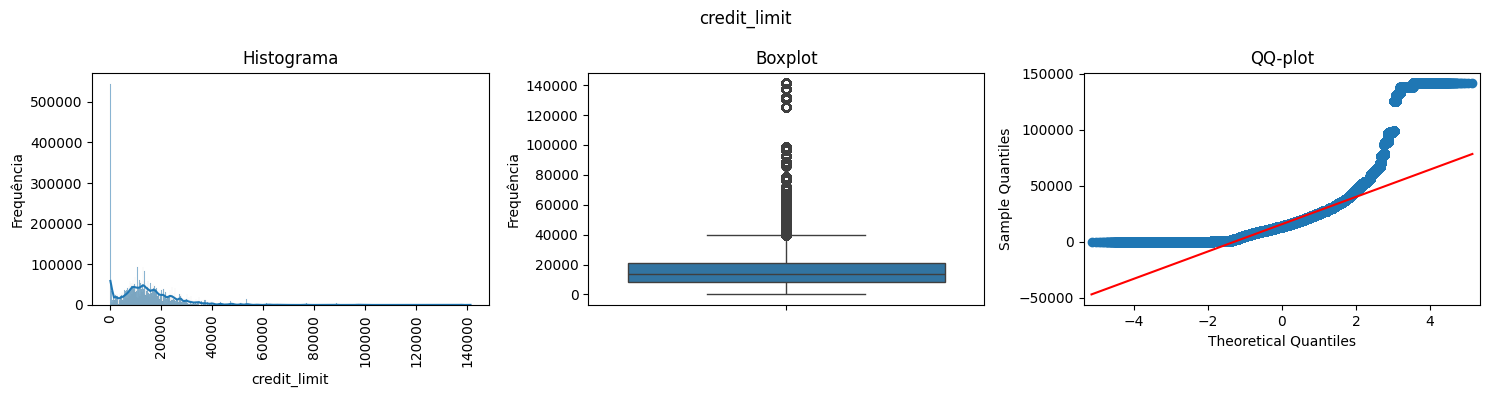

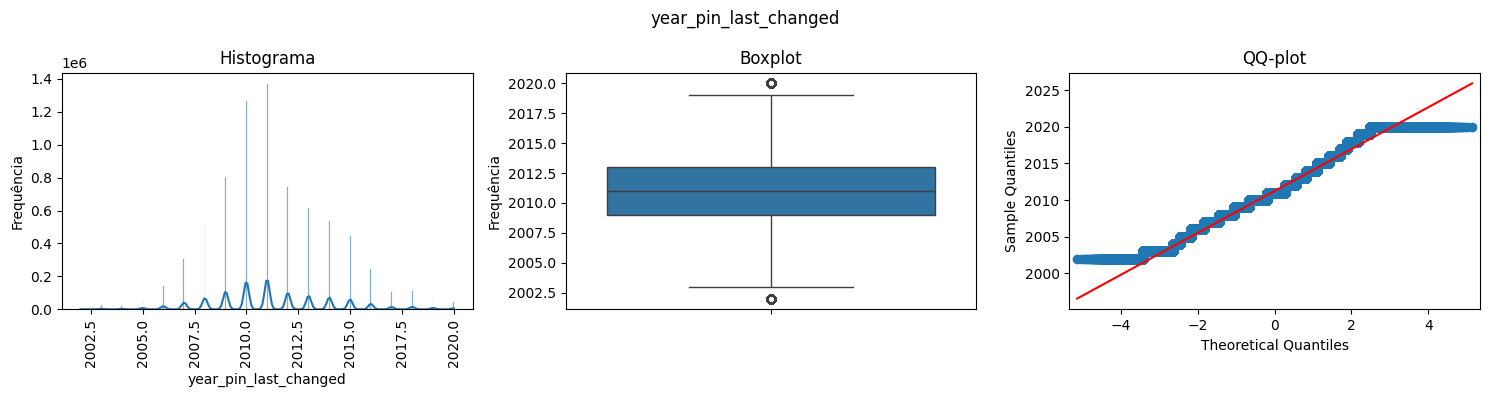

In [214]:
for column in filter(lambda x: x not in ['latitude', 'longitude'], number_columns):
  plot_hist_box(df, column)